In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from functions import *
from stripthem import *

# Processing

In [2]:
path = ('D:\\Uni\\mri\\SK_MRI\\MS_dataset_full\\MS\\01_10\\png')

In [3]:
im = 'IM000012.png'

In [4]:
npat = os.path.join(path,im)

In [5]:
img = cv2.imread(os.path.join(path,im))

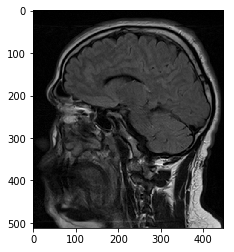

In [6]:
view(img)

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [49]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

In [50]:
brain_mask = remgar(thresh)
brain_mask = np.uint8(brain_mask)

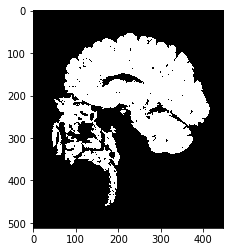

In [51]:
view(brain_mask)

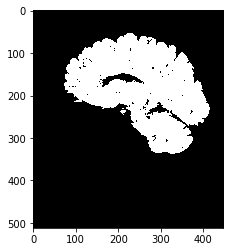

In [52]:
whatif = tophat(brain_mask, kernel(10))
view(whatif)

In [53]:
closing = close(whatif,10)

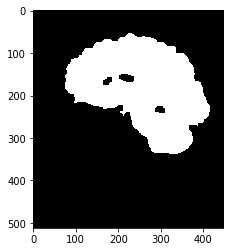

In [54]:
view(closing)

In [55]:
fill = floodfill(closing)

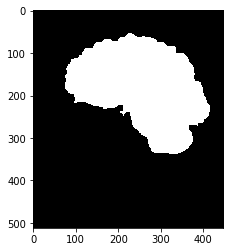

In [56]:
view(fill)

In [15]:
im2, contours, hierarchy = cv2.findContours(fill, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [16]:
cnt = contours[0]

In [49]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

In [50]:
aspect_ratio

0.9090909090909091

In [51]:
(x,y),radius = cv2.minEnclosingCircle(cnt)

In [52]:
zim = np.zeros(gray.shape)

In [53]:
center = (int(x),int(y))
radius = int(radius)
cir = cv2.circle(zim,center,radius,(255,0,0),2)

In [54]:
cir = np.uint8(cir)
fir = floodfill(cir)

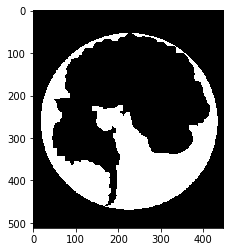

In [55]:
view(fir - fill)

In [56]:
np.sum(fir== 255)/np.sum(fill == 255)

1.7372764786795047

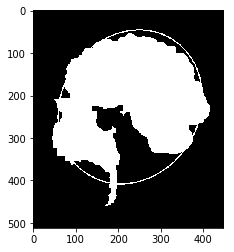

In [57]:
ellipse = cv2.fitEllipse(cnt)
view(cv2.ellipse(fill,ellipse,(255,0,0),2))

In [58]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.742489249673026

In [59]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.5108108108108108

In [61]:
perimeter = cv2.arcLength(cnt,True)
perimeter

1930.4793518781662

In [62]:
area = cv2.contourArea(cnt)
area

76923.0

In [63]:
area / perimeter

39.84658003472635

In [31]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30), (1, 1))

In [92]:
erosion = cv2.erode(fill, element)

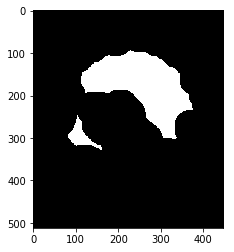

In [93]:
view(erosion)

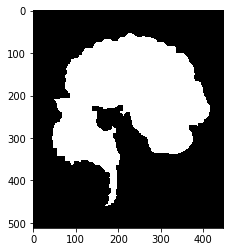

In [17]:
nexttry = tophat(fill, kernel(170))
view(nexttry)

In [20]:
invert = ~fill

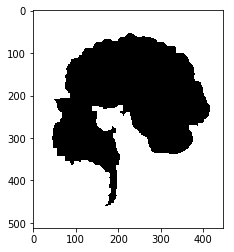

In [21]:
view(invert)

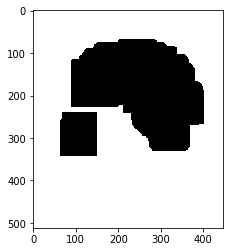

In [25]:
closinginv = close(invert, 80)
view(closinginv)

In [26]:
newview = ~closinginv

In [27]:
newview = remgar(newview)

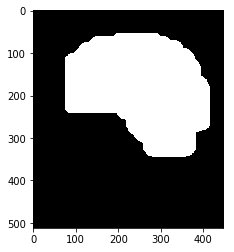

In [32]:
dilate = cv2.dilate(newview, element)
view(dilate)

In [36]:
whynot  = fill.copy()

In [37]:
whynot[dilate == False] = 0

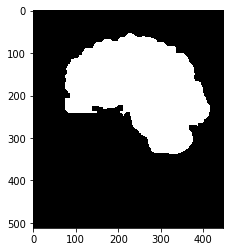

In [38]:
view(whynot)

In [39]:
really = applymask(img, whynot)

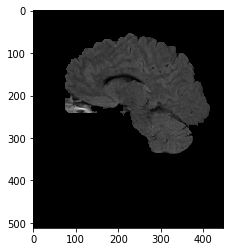

In [40]:
view(really)

In [41]:
gray = cv2.cvtColor(really, cv2.COLOR_BGR2GRAY)

In [42]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

In [43]:
brain_mask = remgar(thresh)
brain_mask = np.uint8(brain_mask)

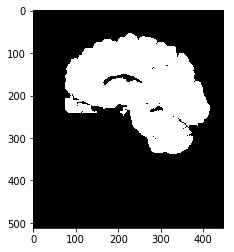

In [44]:
view(brain_mask)

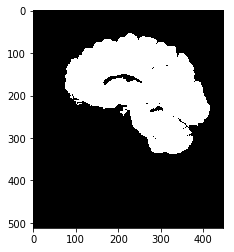

In [47]:
newtop = tophat(brain_mask, kernel(10))
view(newtop)